In [10]:
import torch
import torch.nn as nn 
import torch.optim as optim  
import torchvision.transforms as transforms
import torchvision
import os
import pandas as pd
from PIL import Image
from torch.utils.data import (
    Dataset,
    DataLoader,
)

Imported necessary libraries

In [5]:
class RegressionDataset(Dataset):
    def __init__(self, txt_file, root_dir, transform=None):
        with open(txt_file) as f:
            self.data = f.readlines()
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        line = self.data[index].strip().split()
        img_path = os.path.join(self.root_dir, line[0])
        image = Image.open(img_path)
        target = float(line[1])

        if self.transform:
            image = self.transform(image)

        return (image, target)

Constructed custom dataset for loading data

In [6]:
transform = transforms.Compose([
    transforms.Resize((256,256)),
    #transforms.CenterCrop((224,224),
    transforms.ToTensor(),
    #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

Necessary transformations on image

In [7]:
dataset = RegressionDataset(
    txt_file="mydata.txt",
    root_dir="dataset",
    transform=transform
)

In [9]:
from torch.utils.data import random_split

train_dataset, test_dataset = random_split(dataset, [int(len(dataset) * 0.8), len(dataset) - int(len(dataset) * 0.8)])

train_dataloader = DataLoader(train_dataset, batch_size=10, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=10, shuffle=False)

KeyboardInterrupt: 

Splitted the data with 80% as train data and 20% as test data  then constructed data loader for both train and test dataset

In [ ]:
images , targets = next(iter(train_dataloader))

In [ ]:
images.shape

torch.Size([10, 3, 256, 256])

In [ ]:
targets.shape

torch.Size([10])

labels : tensor([0.8100, 1.2100, 0.0000, 0.7100, 7.0600, 0.0000, 0.0000, 8.7700, 0.0000,
        0.0000], dtype=torch.float64)


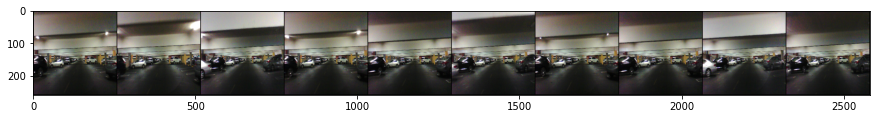

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
grid = torchvision.utils.make_grid(images,nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid,(1,2,0)))
print(f"labels : {targets}")

Visualization of our images

In [11]:
model = torchvision.models.resnet18(pretrained=True)

/home/pranjal-ubuntu/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/pranjal-ubuntu/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/pranjal-ubuntu/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:04<00:00, 10.4MB/s]


In [39]:
network = torch.load("/home/pranjal-ubuntu/Downloads/final_model.pt")

In [13]:
import os 
import scipy.misc
from scipy import pi
import cv2
from subprocess import call
import math
smoothed_angle = 0
xs = []
ys = []

In [44]:

img = cv2.imread('steering.jpg')
#rows,cols,channels = img.shape

In [47]:
rows,cols,channels = img.shape

In [48]:
print(rows)
print(cols)

240
240


In [17]:
with open("data.txt") as f:
    for line in f:
        xs.append("driving_dataset" + line.split()[0])
        ys.append(float(line.split()[1]) * scipy.pi / 180)

In [18]:
num_images = len(xs)
print(num_images)

45406


In [19]:
import math
i = math.ceil(num_images*0.7)
print("Starting frameofvideo:" +str(i))

Starting frameofvideo:31785


In [40]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [49]:

for i in range(num_images):
    full_image = cv2.imread("driving_dataset/" + str(i) + ".jpg", cv2.IMREAD_COLOR)
    image = cv2.resize(full_image, (256, 256))
    #image = np.array(image)
    cv2.imshow("image",image)
    image = torch.from_numpy(image)
    image = image.to(device)
    image = image.float()
    image = image.reshape(1, 3, 256, 256)
    predicted = network(image)
    smoothed_angle += 0.3 * pow(abs((predicted - smoothed_angle)), 2.0 / 3.0) * (predicted - smoothed_angle) / abs(predicted - smoothed_angle)
    #smoothed_angle = smoothed_angle.float()

    #smoothed_angle = smoothed_angle[0][0][0][0].item()
    smoothed_angle = smoothed_angle.item()
    print(smoothed_angle)
    M = cv2.getRotationMatrix2D((cols/2,rows/2),-smoothed_angle,1)
    dst = cv2.warpAffine(img,M,(cols,rows))
    cv2.imshow("steering", dst)
    cv2.waitKey(1)
    i = i+1


15.942599296569824
18.200138092041016
18.933204650878906
19.24143409729004
17.811664581298828
17.020442962646484
15.215985298156738
13.736247062683105
12.793316841125488
13.95438003540039
12.757922172546387
11.945335388183594
10.78192138671875
11.412400245666504
10.047388076782227
11.002970695495605
12.13161563873291
13.257041931152344
12.836163520812988
12.531083106994629
13.684921264648438
14.270275115966797
11.898980140686035
10.671100616455078
11.224099159240723
11.842628479003906
11.688874244689941
10.988483428955078
11.904733657836914
11.826948165893555
14.84081745147705
16.181177139282227
17.666128158569336
16.41827964782715
15.617940902709961
14.674930572509766
11.869634628295898
10.048831939697266
7.448020935058594
5.471833229064941
3.4868264198303223
2.503176689147949
2.734348773956299
3.0570430755615234
0.5898816585540771
1.1197659969329834
-0.014023065567016602
1.4434860944747925
2.4713854789733887
4.521877288818359
5.682774543762207
8.867538452148438
8.041494369506836
6.92

KeyboardInterrupt: 

In [50]:
cv2.destroyWindow("steering")

In [51]:
cv2.destroyWindow("image")